<a href="https://colab.research.google.com/github/armanalam6342/Book-Recommendation-system/blob/main/Book_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Project Title : Book Recommendation System
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.


**Content**



The Book-Crossing dataset comprises 3 files.


**Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.


**Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.


**Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

#<b> Importing Liabraries

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import requests
from io import BytesIO

#<b> Importing Data Frame

In [112]:
books = pd.read_csv("/content/drive/MyDrive/ALMABETTER PROJECT/Book Recomander system/Books.csv")

In [113]:
users = pd.read_csv("/content/drive/MyDrive/ALMABETTER PROJECT/Book Recomander system/Users.csv")

In [114]:
ratings = pd.read_csv("/content/drive/MyDrive/ALMABETTER PROJECT/Book Recomander system/Ratings.csv")

#<b> Data preprocessing

##<b> Books Data Frame

In [115]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [116]:
#Shape of Books Data Frame
books.shape

(271360, 8)

In [117]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [118]:
# Checking Null Values
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [119]:
# droping Null Values
books.dropna(inplace=True)

In [120]:
# shape of dataframe after droping null values
books.shape

(271354, 8)

In [121]:
# DataFrame columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [122]:
# Checking Duplicate Data
books.duplicated().sum()

0

In [123]:
# unique publication dates
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'



1.   All the data in object type but year of publication must be in integers
2.   some of 'year of publication' date are 0 so we have to take some action on it
3.  There are some values above 2021 in "year of publication" so we have to take care of these values also.



In [124]:
# converting dtype of Year of publication from object to integer
books['Year-Of-Publication']=books['Year-Of-Publication'].astype("int")

In [125]:
# we have only 13 values above 2021 
books[books['Year-Of-Publication']>2021].value_counts().sum()

13

In [126]:
# droping values above 2021
books=books[books['Year-Of-Publication']<=2021].reset_index(drop=True)

In [127]:
# we have 3570 values with 0
books[books['Year-Of-Publication']==0].value_counts().sum()

4618

In [128]:
# median of books Year-Of-Publication
books['Year-Of-Publication'].median()

1995.0

In [129]:
#replacing 0 with median value of Year-Of-Publication
books['Year-Of-Publication']=books['Year-Of-Publication'].replace(0,1995)

In [130]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2021, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 1376])

Now look nice

##<b> User DataFrame

In [131]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [132]:
# info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [133]:
# Shape of DataFrame
users.shape

(278858, 3)

In [134]:
# checking Null Values
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [135]:
users.duplicated().sum()

0

##<b> Rating DataFrame

In [136]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [137]:
# shape of data
ratings.shape

(1149780, 3)

In [138]:
# Checking Null Values
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [139]:
# Checking Duplicate Values
ratings.duplicated().sum()

0

#<b> Data prepration

##<b> I will take only those users who rate on minimum 200 books.

##<b> I will consider only those books which are rated by at least 50 users.

In [140]:
# so from 278858 users only 105283 user rated the books
ratings['User-ID'].value_counts().shape

(105283,)

Now we Need only those users who rates on atleast 200 books

In [141]:
users_200 = ratings['User-ID'].value_counts()>200

In [142]:
# here we have 899 users, user_id who rate atleast on 200 books
users_id_200=users_200[users_200].index

In [143]:
users_id_200.shape

(899,)

In [144]:
# New ratings data frame only those people who give ratings atleats on 200 books
ratings=ratings[ratings['User-ID'].isin(users_id_200)]

In [145]:
ratings.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [146]:
# ratings dataframe shape
ratings.shape

(526356, 3)

**We are getting observation from here that 278858 people had rated on 1149780 Books but out of this only 899 people have given rating on 526356 Books 

This tells us that most people do not rate

That's why we removed them from the data**

In [147]:
# creating new data frame of ratings with books
ratings_with_books = ratings.merge(books, on ="ISBN")

In [148]:
ratings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [149]:
ratings_with_books.shape

(487642, 10)

**Now we have only those books on which at least 200 people have rated**

In [150]:
# Count of ratings on each books
count_of_ratings=ratings_with_books.groupby("Book-Title")["Book-Rating"].count().reset_index()

In [151]:
# Renaming the Book-rating column because now its not rating now its count of ratings
count_of_ratings.rename(columns = {"Book-Rating":"count_of_ratings"},inplace= True)

In [152]:
# merging number of rating dataframe with rating with books
rating_df=ratings_with_books.merge(count_of_ratings,on="Book-Title")

In [153]:
# We only consider books that are rated at least 50 times
df=rating_df[rating_df["count_of_ratings"]>=50].reset_index(drop=True)

In [154]:
df.shape

(61853, 11)

**Now we have users who rated at least 200 books and those books which are rated by at least 50 users**

In [155]:
# check duplicates in data
df.duplicated(["User-ID","Book-Title"]).sum()

2003

In [156]:
# droping duplicates
df.drop_duplicates(["User-ID","Book-Title"],inplace=True)

In [157]:
df.shape

(59850, 11)

In [158]:
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,count_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,82


#<b> EDA

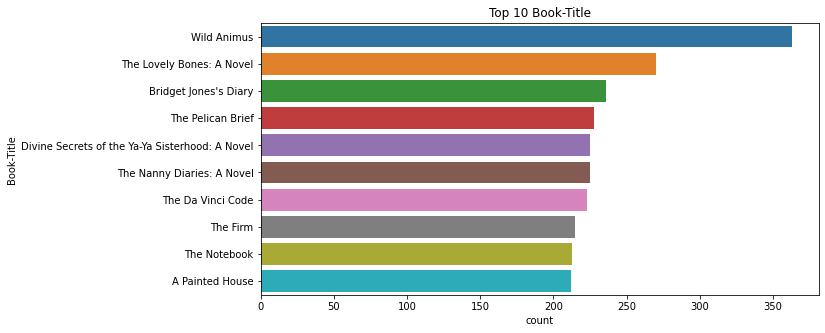

In [159]:
plt.figure(figsize=(10,5))
sns.countplot(y='Book-Title',data=df, order=pd.value_counts(df['Book-Title']).iloc[:10].index)
plt.title('Top 10 Book-Title')
plt.show()



*   The top most book title found is Wild Animus.
*   Selected Poems is present in 350 rows in books data.


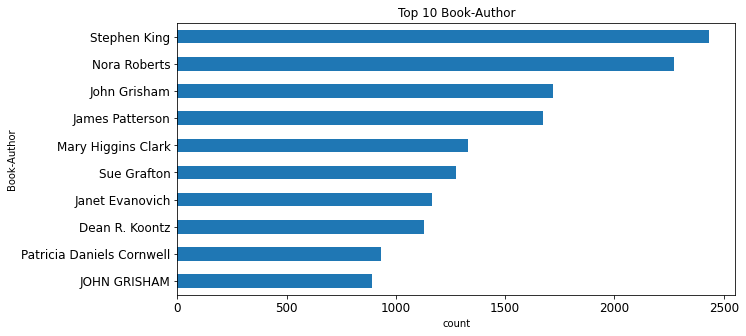

In [160]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = df['Book-Author'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Author', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.show()

*   The top most author found is Stephen King.
*   We have almost 2500 stephen King in books data.

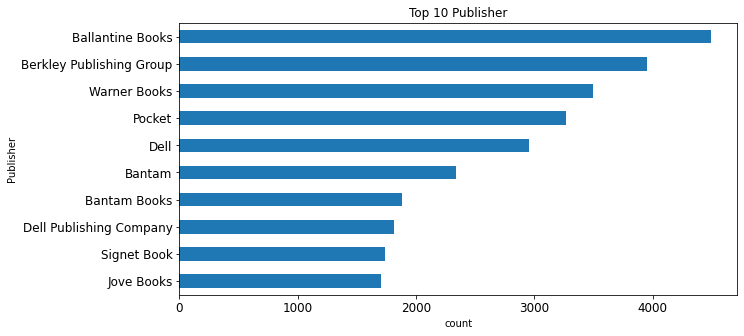

In [161]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = df['Publisher'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Publisher', fontsize=12)
plt.xlabel('count')
plt.ylabel('Publisher')
plt.show()

*   The top most Publishers found is Ballantine Books.
*   We have above 4000 Ballantine Books in data.

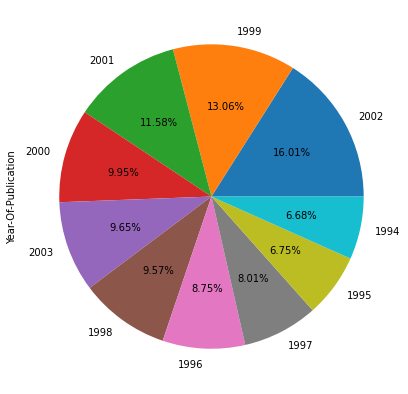

In [162]:
fig= plt.figure(figsize=(15,7))
df['Year-Of-Publication'].value_counts().head(10).plot(kind='pie', autopct='%1.2f%%')
plt.show()

*  Most books were published in the year of 2002.

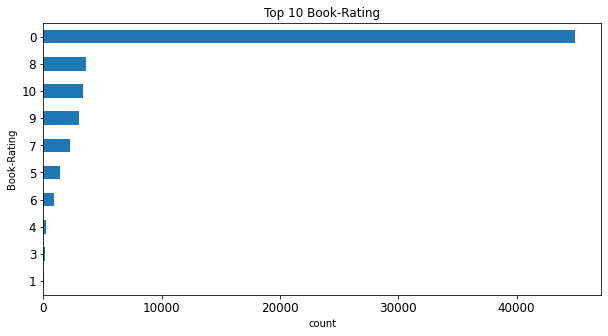

In [163]:
# Checking the ratings.
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ =df['Book-Rating'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Rating', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Rating')
plt.show()

*  Highest rating is 8 out of 10.
*  Lowest rating is 1 out of 10.
*  Most of the people haven't given the ratings.

#<b>Collaborative Filtering

Collaborative filtering (CF) is a technique used by recommender systems.In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating).

##<b> Implementing k-Nearest Neighbour
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “auto”, and we specify “metric=minkowski”. Finally, we fit the model.

At first create a pivote table.

In [164]:
# creating pivot table where user-id becomes our columns and book title become our index
book_pivot=df.pivot_table(columns="User-ID",index="Book-Title",values = 'Book-Rating')

In [165]:
book_pivot.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,9856,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,15957,...,264317,264321,264637,265115,265313,265595,265889,266056,266226,266753,266865,266866,267635,268030,268032,268110,268330,268622,268932,269566,269719,269728,269890,270713,270820,271195,271284,271448,271705,273979,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN


In [166]:
# book_pivot shape
book_pivot.shape

(742, 888)

So we have 888 users and 742 books

In [167]:
# fill Nan values to 0
book_pivot.fillna(0,inplace=True)

In [168]:
book_pivot.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,9856,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,15957,...,264317,264321,264637,265115,265313,265595,265889,266056,266226,266753,266865,266866,267635,268030,268032,268110,268330,268622,268932,269566,269719,269728,269890,270713,270820,271195,271284,271448,271705,273979,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


##<b>CSR matrix

The compressed sparse row (CSR) or compressed row storage (CRS) or Yale format represents a matrix M by three (one-dimensional) arrays, that respectively contain nonzero values, the extents of rows, and column indices. It is similar to COO, but compresses the row indices, hence the name.

In [169]:
# converting to sparse matrix
books_sparse = csr_matrix(book_pivot)

In [170]:
type(books_sparse)

scipy.sparse.csr.csr_matrix

In [171]:
# storing model in a varible
model =  NearestNeighbors(algorithm="brute") # we change our model to brute 

In [172]:
# fitting our model to book sparse data
model.fit(books_sparse)

NearestNeighbors(algorithm='brute')

In [247]:
# create a function for suggest books by book names
def suggest_books_by_book_names(book_name):
  distances, suggestions = model.kneighbors(book_pivot.loc[book_name,:].values.reshape(1,-1), n_neighbors = 6)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Your Choice {0}:\n'.format(book_pivot.index[suggestions[0][0]]))
        book_index_list=books.index[books['Book-Title'] == book_name].tolist()
        book_index = book_index_list[0]
        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()
        print('\n','*'*20, "Recommendation for ", book_name , '*'*20,'\n')

    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_pivot.index[suggestions.flatten()[i]], distances.flatten()[i]))
        book = book_pivot.index[suggestions.flatten()[i]]
        book_index_list=books.index[books['Book-Title'] == book].tolist()
        book_index = book_index_list[0]
        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()


Your Choice Shadowfires:



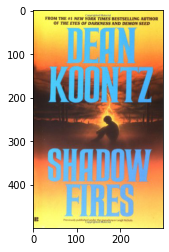


 ******************** Recommendation for  Shadowfires ******************** 

1: Winter Moon, with distance of 25.632011235952593:


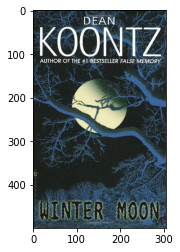

2: Exclusive, with distance of 27.982137159266443:


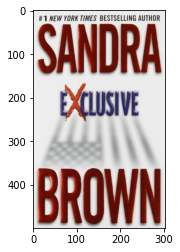

3: Eyes of a Child, with distance of 28.77498913987632:


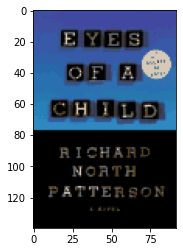

4: Long After Midnight, with distance of 29.103264421710495:


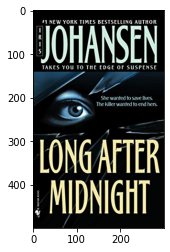

5: While My Pretty One Sleeps, with distance of 29.49576240750525:


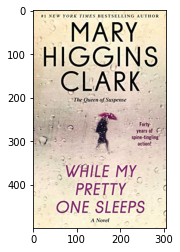

In [248]:
# call function for recommendation
suggest_books_by_book_names('Shadowfires')

In [255]:
# create a function for predict books by index number
def suggest_books_by_index(index_number):
  distances, suggestions = model.kneighbors(book_pivot.iloc[index_number,:].values.reshape(1,-1), n_neighbors = 6)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Your Choice {0}:\n'.format(book_pivot.index[suggestions[0][0]]))
        book = book_pivot.index[suggestions[0][0]]
        book_index_list=books.index[books['Book-Title'] == book].tolist()
        book_index = book_index_list[0]
        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()
        print('\n','*'*20, "Recommendation for ", book , '*'*20,'\n')

    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_pivot.index[suggestions.flatten()[i]], distances.flatten()[i]))
        book = book_pivot.index[suggestions.flatten()[i]]
        book_index_list=books.index[books['Book-Title'] == book].tolist()
        book_index = book_index_list[0]
        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()

Your Choice Harry Potter and the Chamber of Secrets (Book 2):



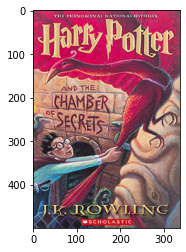


 ******************** Recommendation for  Harry Potter and the Chamber of Secrets (Book 2) ******************** 

1: Harry Potter and the Prisoner of Azkaban (Book 3), with distance of 68.78953408767936:


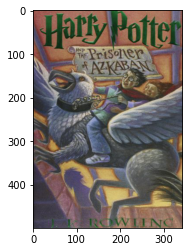

2: Harry Potter and the Goblet of Fire (Book 4), with distance of 69.54135460285484:


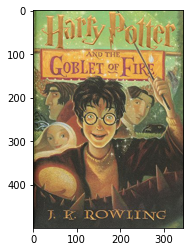

3: Harry Potter and the Sorcerer's Stone (Book 1), with distance of 72.64296249465602:


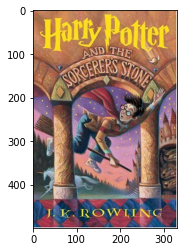

4: Exclusive, with distance of 76.83098333354845:


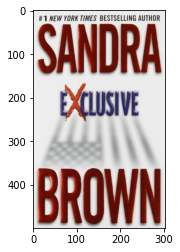

5: The Cradle Will Fall, with distance of 77.28518616138541:


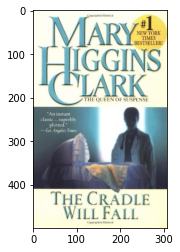

In [258]:
# call function for recommendation
suggest_books_by_index(237)